In [2]:
import tensorflow as tf
import mitdeeplearning as mdl
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

In [4]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

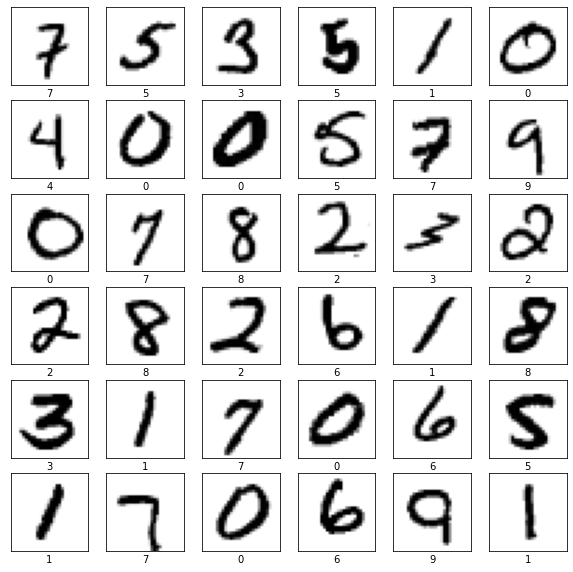

In [9]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]),cmap = plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax),
])

In [14]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [19]:
BATCH_SIZE = 64
EPOCHS = 10
model.fit(train_images, train_labels, BATCH_SIZE, EPOCHS, validation_split = 0.1)

Epoch 1/10
844/844 [==============================] - 2s 2ms/step - loss: 0.0157 - accuracy: 0.9958 - val_loss: 0.0182 - val_accuracy: 0.9948
Epoch 2/10
844/844 [==============================] - 1s 2ms/step - loss: 0.0130 - accuracy: 0.9967 - val_loss: 0.0151 - val_accuracy: 0.9958
Epoch 3/10
844/844 [==============================] - 1s 2ms/step - loss: 0.0112 - accuracy: 0.9971 - val_loss: 0.0223 - val_accuracy: 0.9937
Epoch 4/10
844/844 [==============================] - 1s 2ms/step - loss: 0.0084 - accuracy: 0.9981 - val_loss: 0.0358 - val_accuracy: 0.9890
Epoch 5/10
844/844 [==============================] - 1s 2ms/step - loss: 0.0078 - accuracy: 0.9981 - val_loss: 0.0234 - val_accuracy: 0.9928
Epoch 6/10
844/844 [==============================] - 1s 2ms/step - loss: 0.0081 - accuracy: 0.9979 - val_loss: 0.0278 - val_accuracy: 0.9915
Epoch 7/10
844/844 [==============================] - 1s 2ms/step - loss: 0.0059 - accuracy: 0.9986 - val_loss: 0.0333 - val_accuracy: 0.9898
Epoch 

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test_Loss = {:.4f}'.format(test_loss))
print('-'*50)
print('Test_Accuracy = {:.2f}%'.format(test_acc*100))

313/313 [==============================] - 0s 849us/step - loss: 0.0826 - accuracy: 0.9801
Test_Loss = 0.0826
--------------------------------------------------
Test_Accuracy = 98.01%


###### CNN For Handwritten Digits Classfication

In [29]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=24,kernel_size=(3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=36,kernel_size=(3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [34]:
cnn.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [35]:
cnn.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 17s 19ms/step - loss: 0.4395 - accuracy: 0.8706 - val_loss: 0.0651 - val_accuracy: 0.9822
Epoch 2/10
844/844 [==============================] - 16s 19ms/step - loss: 0.0619 - accuracy: 0.9804 - val_loss: 0.0532 - val_accuracy: 0.9847
Epoch 3/10
844/844 [==============================] - 16s 19ms/step - loss: 0.0422 - accuracy: 0.9861 - val_loss: 0.0394 - val_accuracy: 0.9900
Epoch 4/10
844/844 [==============================] - 16s 19ms/step - loss: 0.0287 - accuracy: 0.9911 - val_loss: 0.0401 - val_accuracy: 0.9893
Epoch 5/10
844/844 [==============================] - 16s 19ms/step - loss: 0.0243 - accuracy: 0.9918 - val_loss: 0.0403 - val_accuracy: 0.9903
Epoch 6/10
844/844 [==============================] - 16s 20ms/step - loss: 0.0175 - accuracy: 0.9943 - val_loss: 0.0430 - val_accuracy: 0.9873
Epoch 7/10
844/844 [==============================] - 17s 20ms/step - loss: 0.0148 - accuracy: 0.9953 - val_loss: 0.0350 - val_accuracy:

In [37]:
test_loss, test_acc = cnn.evaluate(test_images, test_labels)
print('Test_Loss = {:.4f}'.format(test_loss))
print('-'*50)
print('Test_Accuracy = {:.2f}%'.format(test_acc*100))

313/313 [==============================] - 1s 4ms/step - loss: 0.0367 - accuracy: 0.9892
Test_Loss = 0.0367
--------------------------------------------------
Test_Accuracy = 98.92%


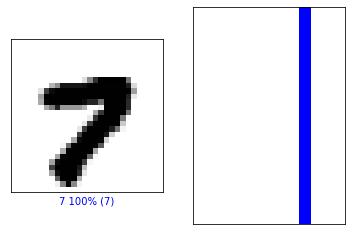

In [39]:
image_index = 79 
predictions = cnn.predict(test_images)
plt.subplot(1,2,1)
mdl.lab2.plot_image_prediction(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
mdl.lab2.plot_value_prediction(image_index, predictions,  test_labels)

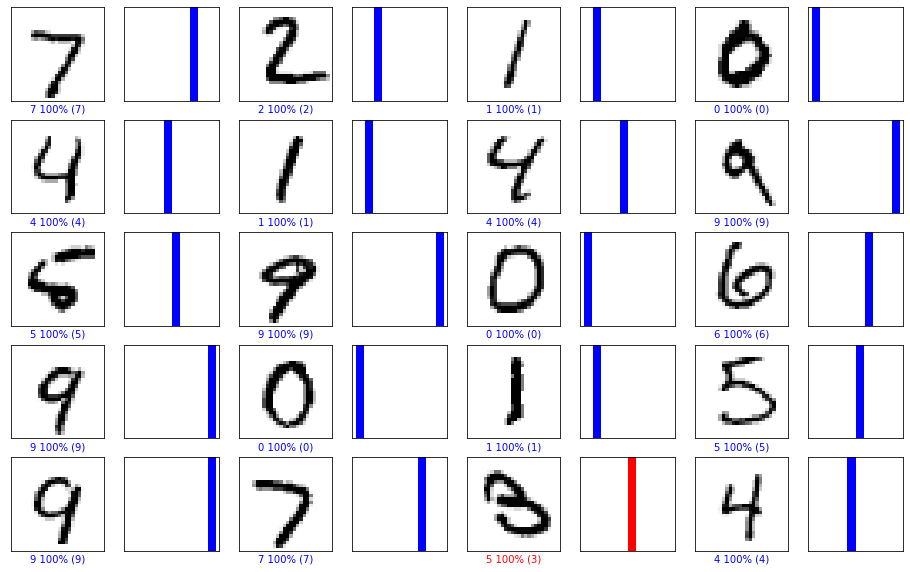

In [40]:
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    mdl.lab2.plot_image_prediction(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    mdl.lab2.plot_value_prediction(i, predictions, test_labels)